<a href="https://colab.research.google.com/github/joygeo007/Iro.it/blob/main/MangaColorerToy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display


In [2]:
!gdown 1ZbR2NOeBYN4D0XhHnteiril0QJFOi824

Downloading...
From (original): https://drive.google.com/uc?id=1ZbR2NOeBYN4D0XhHnteiril0QJFOi824
From (redirected): https://drive.google.com/uc?id=1ZbR2NOeBYN4D0XhHnteiril0QJFOi824&confirm=t&uuid=2b629748-c4bb-4bc5-aa57-edab99402e1c
To: /content/cover_images.zip
100% 52.1M/52.1M [00:02<00:00, 24.0MB/s]


In [3]:
!unzip /content/cover_images.zip

Archive:  /content/cover_images.zip
   creating: cover_images/AisazuNihaIrarenai/
  inflating: cover_images/AisazuNihaIrarenai/000.jpg  
  inflating: cover_images/AisazuNihaIrarenai/093.jpg  
   creating: cover_images/AkkeraKanjinchou/
  inflating: cover_images/AkkeraKanjinchou/000.jpg  
  inflating: cover_images/AkkeraKanjinchou/091.jpg  
   creating: cover_images/Akuhamu/
  inflating: cover_images/Akuhamu/000.jpg  
  inflating: cover_images/Akuhamu/080.jpg  
   creating: cover_images/AosugiruHaru/
  inflating: cover_images/AosugiruHaru/000.jpg  
  inflating: cover_images/AosugiruHaru/104.jpg  
   creating: cover_images/AppareKappore/
  inflating: cover_images/AppareKappore/000.jpg  
  inflating: cover_images/AppareKappore/096.jpg  
   creating: cover_images/Arisa/
  inflating: cover_images/Arisa/000.jpg  
  inflating: cover_images/Arisa/096.jpg  
   creating: cover_images/ARMS/
  inflating: cover_images/ARMS/000.jpg  
  inflating: cover_images/ARMS/080.jpg  
   creating: cover_images

In [4]:
#!rm -rf cover_images

In [5]:
import os
import cv2

def convert_to_grayscale(image_path):
  """
  Converts an image to grayscale and saves it.

  Args:
    image_path: The path to the image file.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Convert to grayscale
  grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Save the grayscale image
  cv2.imwrite(f'{image_path[:-4]}_gs.jpg', grayscale_image)

# Get a list of all image paths in the cover_images directory
image_paths = []
for root, dirs, files in os.walk("/content/cover_images"):
  for filename in files:
    image_paths.append(os.path.join(root, filename))

# Convert all images to grayscale
for image_path in image_paths:
  convert_to_grayscale(image_path)


In [6]:
import os
import shutil

# Create the images directory
!mkdir images

# Get a list of all subdirectories in cover_images
subdirectories = [d for d in os.listdir("/content/cover_images") if os.path.isdir(os.path.join("/content/cover_images", d))]

# Copy all images from all subdirectories to the images directory, renaming them to "subdirectory" + image_name
for subdirectory in subdirectories:
  for filename in os.listdir(os.path.join("/content/cover_images", subdirectory)):
    if filename.endswith(".jpg"):
      shutil.copyfile(os.path.join("/content/cover_images", subdirectory, filename), os.path.join("/content/images", f"{subdirectory}_{filename}"))


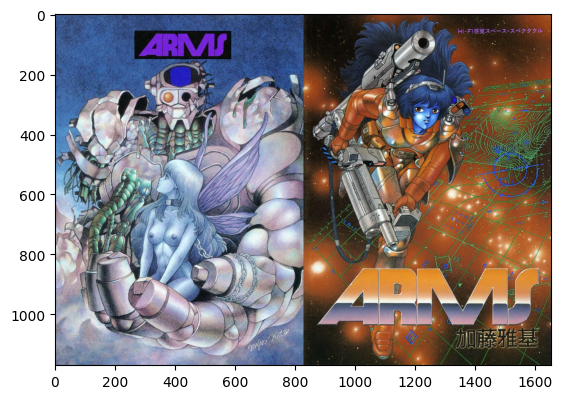

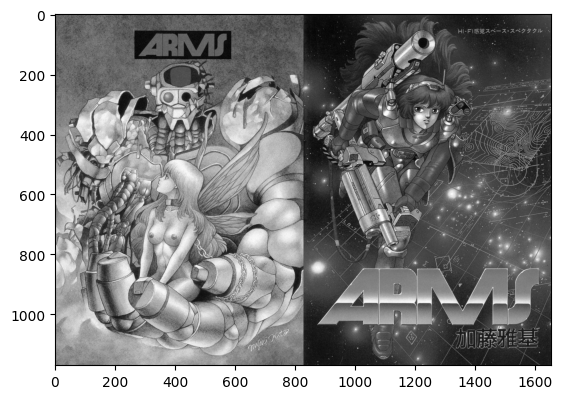

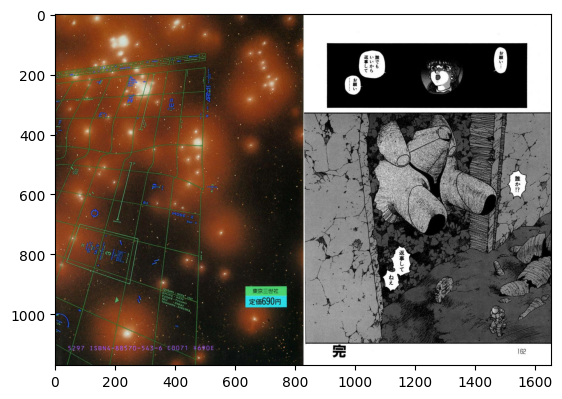

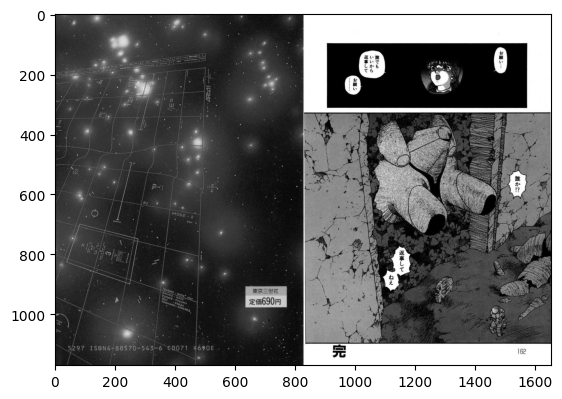

In [7]:

import matplotlib.pyplot as plt
import cv2

images_path = "/content/images"

# Get a list of the first 4 images in the images folder
first_four_images = sorted(os.listdir(images_path))[:4]

# Display the first 4 images
for image_name in first_four_images:
  image_path = os.path.join(images_path, image_name)
  image = cv2.imread(image_path)
  plt.imshow(image)
  plt.show()


In [3]:
import numpy as np
import os
import tensorflow as tf
image_path = os.path.join(images_path, first_four_images[0])
image = cv2.imread(image_path)
im = np.array(image)
im.shape

NameError: name 'images_path' is not defined

In [4]:
import tensorflow

In [5]:
def load(image_file):


    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_file)
    image = tf.io.decode_jpeg(image)

    gray_image = tf.io.read_file(image_file[:-4]+"_gs.jpg")
    gray_image = tf.io.decode_jpeg(gray_image)

    # Split each image tensor into two tensors:
    # - one with a real building facade image
    # - one with an architecture label image
    w = tf.shape(image)[1]
    w = w // 2
    input_image1 = image[:, w:, :]
    input_image2 = image[:, :w, :]

    gray_image1 = gray_image[:, w:, :]
    gray_image2 = gray_image[:, :w, :]

    # Convert both images to float32
    input_image1 = tf.cast(input_image1, tf.float32)
    input_image2 = tf.cast(input_image2, tf.float32)

    gray_image1 = tf.cast(gray_image1, tf.float32)
    gray_image2 = tf.cast(gray_image2, tf.float32)


    return gray_image1, input_image1, gray_image2,  input_image2

In [6]:
import glob
imgs = glob.glob("/content/images/*.jpg")
color_imgs = np.array([i for i in imgs if "_gs.jpg" not in i])
color_imgs[:4]

array(['/content/images/RisingGirl_000.jpg',
       '/content/images/MomoyamaHaikagura_000.jpg',
       '/content/images/SaladDays_vol01_090.jpg',
       '/content/images/SaladDays_vol18_000.jpg'], dtype='<U56')

In [7]:
all_imgs = [list(load(i)) for i in color_imgs]

In [8]:
img_pairs = []
for i in all_imgs:
    for j in [0,2]:
        img_pairs.append(i[j:j+2])

In [9]:
del all_imgs,imgs,color_imgs

In [ ]:
# Pickle and save img_pairs
import pickle

with open('img_pairs.pkl', 'wb') as f:
  pickle.dump(img_pairs, f)

# Load the pickled img_pairs
#with open('img_pairs.pkl', 'rb') as f:
#  img_pairs = pickle.load(f)


In [14]:
len(img_pairs)

436

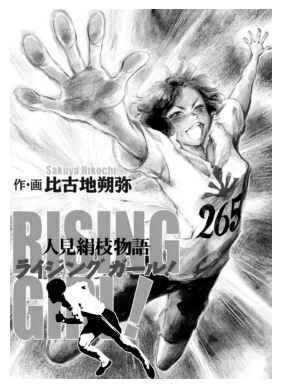

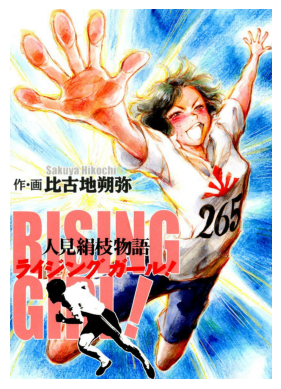

In [15]:
plt.imshow((img_pairs[0][0]).numpy()/255.0,cmap="gray")
plt.axis('off')
plt.show()
plt.imshow((img_pairs[0][1]).numpy()/255.0)
plt.axis('off')
plt.show()


In [16]:
# The facade training set consist of 400 images
BUFFER_SIZE = 436
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 1170 x 827 in size
IMG_WIDTH = 1170
IMG_HEIGHT = 827

In [17]:
def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return input_image, real_image

def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(
        stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image[0], cropped_image[1]

# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1

    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # Resizing to 286x286
    input_image, real_image = resize(input_image, real_image, 286, 286)

    # Random cropping back to 256x256
    input_image, real_image = random_crop(input_image, real_image)

    if tf.random.uniform(()) > 0.5:
        # Random mirroring
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image


#load image and add jitter and normalise
def load_image_train(image_file):
    input_image, real_image, input_image1, real_image1 = load(image_file)

    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)

    input_image1, real_image1 = random_jitter(input_image1, real_image1)
    input_image1, real_image1 = normalize(input_image1, real_image1)


    return (input_image, real_image) , (input_image1,real_image1)



In [26]:
len(img_pairs)

436

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((x[i][0],x[i][1]) for x in range(len(img_pairs)))


ValueError: Attempt to convert a value (<generator object <genexpr> at 0x798e45f47d10>) with an unsupported type (<class 'generator'>) to a Tensor.

In [ ]:
# function to split the tuples into separate elements
def split_image_pairs(image_pairs1, image_pairs2):
    return tf.data.Dataset.from_tensors(image_pairs1).concatenate(tf.data.Dataset.from_tensors(image_pairs2))

# Map the dataset using load_image_train and then flat_map to split the pairs
train_dataset = train_dataset.flat_map(lambda file_path: tf.data.Dataset.from_tensors(file_path)
                                       .map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
                                       .flat_map(lambda pairs: split_image_pairs(pairs[0], pairs[1])))

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

# To verify the shapes
for batch in train_dataset.take(1):
    input_images, real_images = batch
    print(input_images.shape, real_images.shape)

In [ ]:
OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)



In [ ]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False))

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)


In [ ]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)


In [ ]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)


In [ ]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])


In [ ]:
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss


In [ ]:
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss


In [ ]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

    x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

    down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
    down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
    down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)


In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)


In [ ]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()


In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [ ]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()


In [ ]:
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)


In [ ]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


In [ ]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)


In [ ]:
fit(train_dataset, test_dataset, steps=40000)
